In [1]:
## for data
import numpy as np
import pandas as pd

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
import ppscore

## for machine learning
from sklearn import preprocessing, impute, utils, linear_model, feature_selection, model_selection, metrics, decomposition, cluster, ensemble
import imblearn

## for deep learning
from tensorflow.keras import models, layers
import minisom

## for explainer
from lime import lime_tabular
#import shap

## for geospatial
import folium
import geopy
import warnings
warnings.filterwarnings("ignore")
from ml_utilis_summaryPre_processing import *


In [2]:
df = pd.read_csv('data_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
utils_recognize_type_lst(df=df, cols=df.columns)

close


{'lst_categoricals': ['Survived',
  'Pclass',
  'Name',
  'Sex',
  'SibSp',
  'Parch',
  'Ticket',
  'Cabin',
  'Embarked'],
 'lst_continious': ['PassengerId', 'Age', 'Fare']}

In [4]:
df_overview(df=df, choose='dataframe', max_cat=20, figsize=(10,5))

Shape: (891, 12)
-----------------


,Feature,Type_Feature,NAS,Check_data,Check
0,PassengerId,Continious,Nas: 0(0%),Min-Max: (1)-(891),Possible check
1,Survived,categorical,Nas: 0(0%),Categories: 2,None
2,Pclass,categorical,Nas: 0(0%),Categories: 3,None
3,Name,categorical,Nas: 0(0%),Categories: 891,Possible check
4,Sex,categorical,Nas: 0(0%),Categories: 2,None
5,Age,Continious,Nas: 177(19%),Min-Max: (0)-(80),None
6,SibSp,categorical,Nas: 0(0%),Categories: 7,None
7,Parch,categorical,Nas: 0(0%),Categories: 7,None
8,Ticket,categorical,Nas: 0(0%),Categories: 681,None
9,Fare,Continious,Nas: 0(0%),Min-Max: (0)-(512),None


 Categerocial   Numerical   NaN 


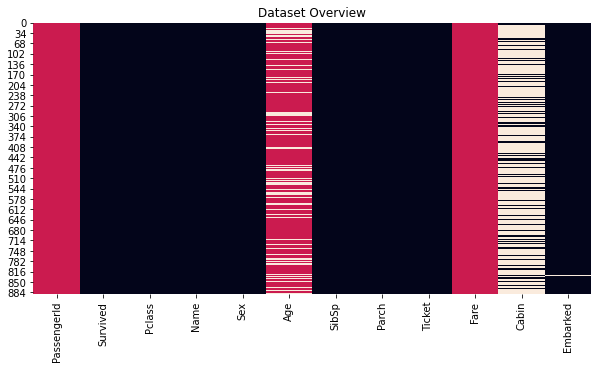

(Text(0.5, 1.0, 'Dataset Overview'), None)

In [5]:
df_overview(df=df, choose='visualization', max_cat=20, figsize=(10,5))

In [6]:
check_pk(df, pk='PassengerId')

OK!!!  unique PassengerId: 891  |  len dtf: 891


In [7]:
pop_columns(df,lst_cols=['Embarked'], where="front")

,Embarked,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
0,S,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN
1,C,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85
2,S,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,S,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123
4,S,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,S,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN
887,S,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42
888,S,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN
889,C,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148


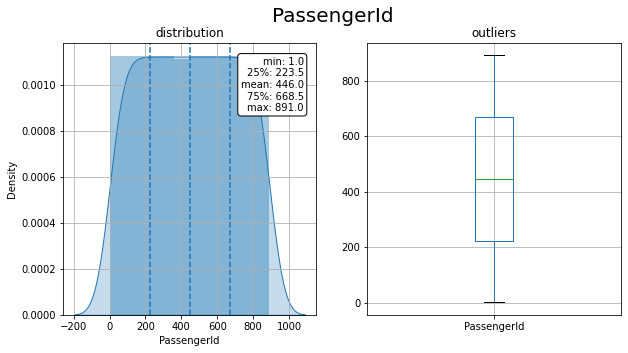

In [8]:
freqdist_plot(dtf=df, x='PassengerId')

In [9]:
df = df.rename(columns={"Survived":"Y"})

In [10]:
df = pd.read_csv("data_houses.csv")
cols = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","FullBath","YearBuilt","YearRemodAdd",
        "LotFrontage","MSSubClass"]
df = df[["Id"]+cols+["SalePrice"]]
df.head()

,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd,LotFrontage,MSSubClass,SalePrice
0,1,7,1710,2,548,856,2,2003,2003,65.0,60,208500
1,2,6,1262,2,460,1262,2,1976,1976,80.0,20,181500
2,3,7,1786,2,608,920,2,2001,2002,68.0,60,223500
3,4,7,1717,3,642,756,1,1915,1970,60.0,70,140000
4,5,8,2198,3,836,1145,2,2000,2000,84.0,60,250000


In [11]:
df_overview(df, max_cat=20, figsize=(10,5))

Shape: (1460, 12)
-----------------


,Feature,Type_Feature,NAS,Check_data,Check
0,Id,Continious,Nas: 0(0%),Min-Max: (1)-(1460),Possible check
1,OverallQual,categorical,Nas: 0(0%),Categories: 10,None
2,GrLivArea,Continious,Nas: 0(0%),Min-Max: (334)-(5642),None
3,GarageCars,categorical,Nas: 0(0%),Categories: 5,None
4,GarageArea,Continious,Nas: 0(0%),Min-Max: (0)-(1418),None
5,TotalBsmtSF,Continious,Nas: 0(0%),Min-Max: (0)-(6110),None
6,FullBath,categorical,Nas: 0(0%),Categories: 4,None
7,YearBuilt,Continious,Nas: 0(0%),Min-Max: (1872)-(2010),None
8,YearRemodAdd,Continious,Nas: 0(0%),Min-Max: (1950)-(2010),None
9,LotFrontage,Continious,Nas: 259(17%),Min-Max: (21)-(313),None


In [12]:
dtf = df.set_index("Id")
dtf = df.rename(columns={"SalePrice":"Y"})

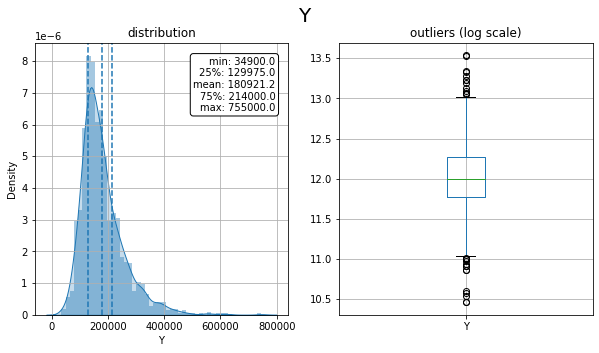

In [13]:
freqdist_plot(dtf, "Y", box_logscale=True, figsize=(10,5))

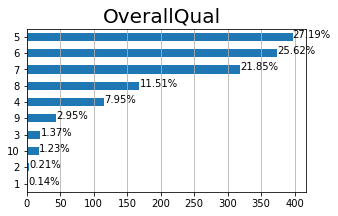

(Text(0.5, 0.98, 'OverallQual'), None)

In [14]:
#--- OverallQual ---#
freqdist_plot(dtf, "OverallQual", figsize=(5,3))

--- got error ---
not enough values to unpack (expected 2, got 1)


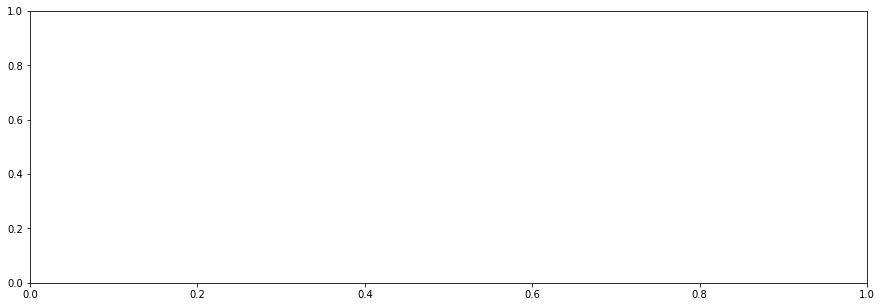

In [15]:
bivariate_plot(dtf, x="TotalBsmtSF", y="Y", figsize=(15,5))

In [16]:
df_overview(dtf, max_cat=20, figsize=(10,5))

Shape: (1460, 12)
-----------------


,Feature,Type_Feature,NAS,Check_data,Check
0,Id,Continious,Nas: 0(0%),Min-Max: (1)-(1460),Possible check
1,OverallQual,categorical,Nas: 0(0%),Categories: 10,None
2,GrLivArea,Continious,Nas: 0(0%),Min-Max: (334)-(5642),None
3,GarageCars,categorical,Nas: 0(0%),Categories: 5,None
4,GarageArea,Continious,Nas: 0(0%),Min-Max: (0)-(1418),None
5,TotalBsmtSF,Continious,Nas: 0(0%),Min-Max: (0)-(6110),None
6,FullBath,categorical,Nas: 0(0%),Categories: 4,None
7,YearBuilt,Continious,Nas: 0(0%),Min-Max: (1872)-(2010),None
8,YearRemodAdd,Continious,Nas: 0(0%),Min-Max: (1950)-(2010),None
9,LotFrontage,Continious,Nas: 259(17%),Min-Max: (21)-(313),None


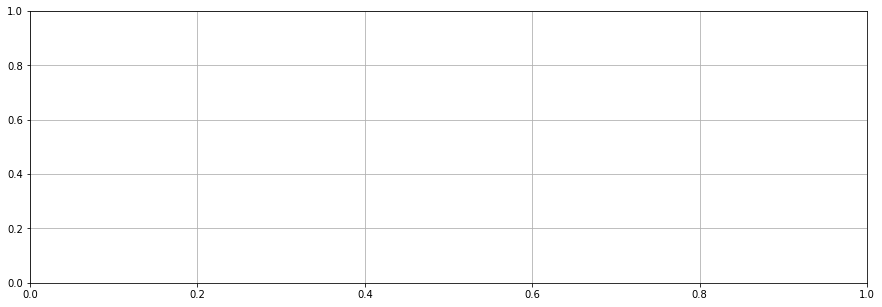

In [17]:
# this variable is tricky as it has 15 classes, so I will plot manually in one boxplot
fig, ax = plt.subplots(figsize=(15,5))
sns.catplot(x="MSSubClass", y="Y", data=dtf, kind="box", ax=ax)
ax.grid(True)
plt.close()

In [18]:
data = pd.read_csv('data_titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

--- got error ---
rename() got an unexpected keyword argument 'columns'


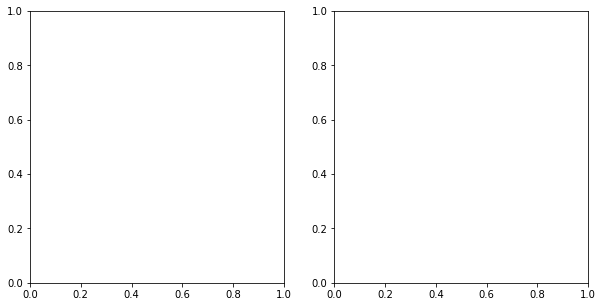

In [20]:
#--- Age ---#
nan_analysis(data, na_x="Age", y="Cabin", max_cat=20, figsize=(10,5))

<AxesSubplot:title={'center':'Survived by Age'}, xlabel='Age'>

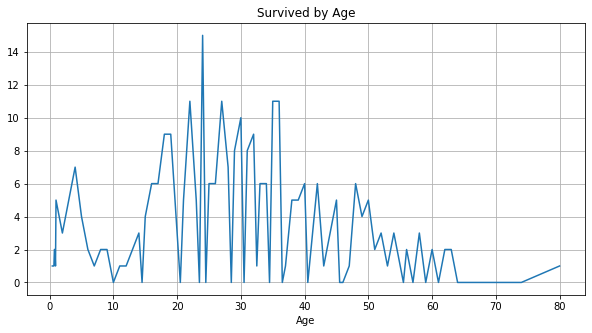

In [21]:
ts_analysis(data, x="Age", y="Survived", figsize=(10,5))

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Text(0.5, 1.0, 'Pclass  vs  Sex  (filter: Survived)')

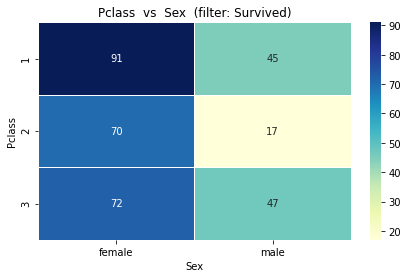

In [23]:
cross_distributions(data, x1="Pclass", x2="Sex", y="Survived", figsize=(7,4))

--- WARNING: Factorizing 891 labels of Name ---
--- WARNING: Factorizing 2 labels of Sex ---
--- WARNING: Factorizing 681 labels of Ticket ---
--- WARNING: Factorizing 147 labels of Cabin ---
--- WARNING: Factorizing 3 labels of Embarked ---


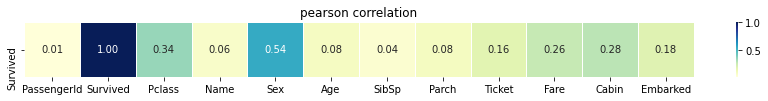

In [24]:
corr = corr_matrix(data, method="pearson", negative=False, lst_filters=["Survived"], figsize=(15,1))

In [25]:
# pps = pps_matrix(dtf, lst_filters=["Y"], figsize=(15,1))

In [26]:
coeff, p = test_corr(dtf, x="LotFrontage", y="Y")

Pearson Correlation: 0.352 Significant (p-value: 0.0)


In [27]:
check = rebalance(data, y="Survived", balance='down')

--- situation ---
   Survived      %
0       549  61.6%
1       342  38.4%
tot: 891
--- downsampling ---
   randomly remove observations of the majority class (Underfitting risk)
--- new situation ---
   Survived      %
0       549  50.0%
1       549  50.0%
tot: 1098


In [28]:
check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [30]:
# I will summarise this categories in clusters
MSSubClass_clusters = {"min":[30,45,180], "max":[60,120], "mean":[]}
dtf = add_feature_clusters(dtf, "MSSubClass", dic_clusters_mapping=MSSubClass_clusters, dropx=False)
dtf[["MSSubClass","MSSubClass_cluster","Y"]]

,MSSubClass,MSSubClass_cluster,Y
0,60,max,208500
1,20,mean,181500
2,60,max,223500
3,70,mean,140000
4,60,max,250000
...,...,...,...
1455,60,max,175000
1456,20,mean,210000
1457,70,mean,266500
1458,20,mean,142125
